### Задание 1

###

In [39]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab
import math

from scipy.misc import derivative
from scipy.misc import electrocardiogram
from scipy.optimize import fmin, brute
from scipy.signal import find_peaks
from PIL import Image

Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))

In [38]:
raitings = [[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
            [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
            [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
            [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
            [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
            [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
            [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
            [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
            [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
            [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]]

In [45]:
df=pd.DataFrame(raitings)
df.iloc[:,1]

0     4
1     2
2     6
3     1
4     7
5     3
6     8
7     1
8     7
9    10
Name: 1, dtype: int64

<b> a) </b> Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

In [57]:
maxxx=[]
maxjj=[]
X = np.array(df.iloc[:,0])
Y = np.array(df.iloc[:,1])
for i  in range(10):
    maxx=0
    maxj=0
    for j in range(10):
        V = np.array([[X[i],Y[i]],[X[j],Y[j]]])
        if np.dot(V[0],V[1]) > maxx:
            maxx=np.dot(V[0],V[1])
            maxj=j+1
    maxxx.append(maxx)
    maxjj.append(maxj)
    print(f'Скалярное произведение равно {maxx}', i)

print(maxxx)
print(f'Лучшние пользователи по 2м фильмам', maxjj)

#Треш еще тот написал, вообще не очень понятно, как считать косинус на весь датафрейм или его часть. В дз делал только на 2 атрибута, а тут весь и что-то потерялся,
#Сделал как в домашке, добавив циклы :)


Скалярное произведение равно 68 0
Скалярное произведение равно 97 1
Скалярное произведение равно 65 2
Скалярное произведение равно 62 3
Скалярное произведение равно 85 4
Скалярное произведение равно 96 5
Скалярное произведение равно 145 6
Скалярное произведение равно 44 7
Скалярное произведение равно 80 8
Скалярное произведение равно 125 9
[68, 97, 65, 62, 85, 96, 145, 44, 80, 125]
Лучшние пользователи по 2м фильмам [7, 7, 10, 7, 10, 7, 7, 7, 10, 7]


<b> b) </b>Предположим, вы захотели сжать признаковые описания пользователя с 15 фильмов, до, скажем, 5-ти признаков, как вы это сделаете?

приближением матрицей меньшего ранга

### Задание 2

Вычислите производную $tg^2(sin(x) + cos(2x+3))$ в точке $x_0=1$ на python и на бумаге (просто подставить точку в производную и ничего не упрощать).

In [25]:
from sympy import *

x = Symbol('x')
y = (tan(sin(x)+cos(2*x+3)))**2

num=1 #Номер производной
print (y)
for i in range(1,num+1,1):
    yprime = y.diff(x)
    y=yprime
    print(i,yprime)


tan(sin(x) + cos(2*x + 3))**2
1 2*(-2*sin(2*x + 3) + cos(x))*(tan(sin(x) + cos(2*x + 3))**2 + 1)*tan(sin(x) + cos(2*x + 3))


In [26]:
from scipy.misc import derivative
def f(x):
    return (2*(-2*np.sin(2*x + 3) + np.cos(x))*(np.tan(np.sin(x) + np.cos(2*x + 3))**2 + 1)*np.tan(np.sin(x) + np.cos(2*x + 3)))
derivative(f, 1.0, dx=1e-6)

875.4989299895044

В посчитанной руками производной я уверен, а как считает питон - для меня загадка, вроде всё верно написал

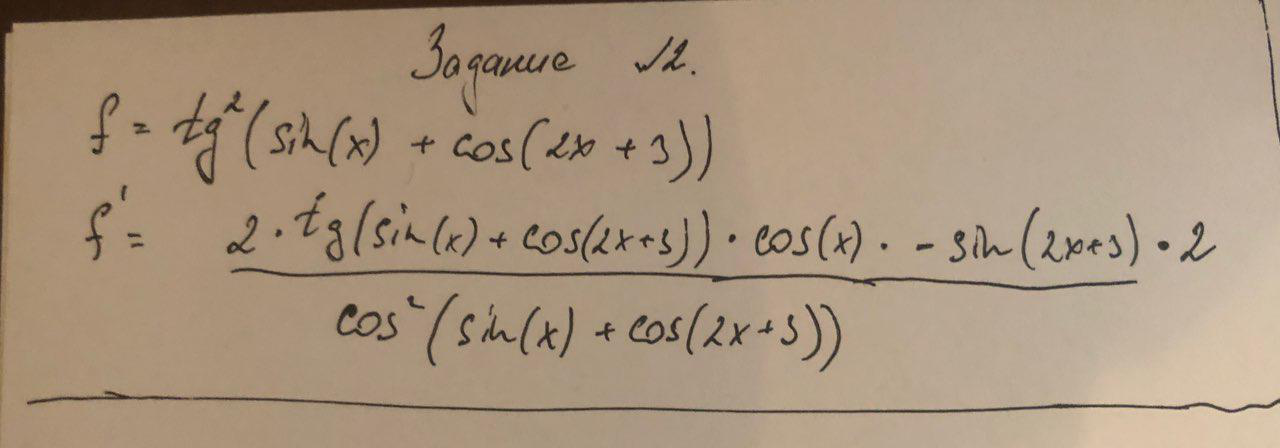

In [27]:
img = Image.open("1.jpg")
img

### Задание 3

Дана функция с неизвестными параметрами a и b, вам также известны значения функции fx в точках x. Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку <b>error</b>

In [64]:
import matplotlib.pyplot as plt
from scipy.optimize import minimize
%matplotlib inline

In [65]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [66]:
x = [0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
       1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
       2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
       3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ]

In [67]:
fx = [  0.        , -12.01819092, -18.90968634, -17.68786571,
        -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
        19.22059845,   9.48411207,  -3.22273056, -13.48576488,
       -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
        22.12489421,  24.20292139,  18.04522521,   6.33211092]

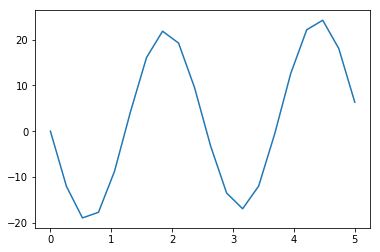

In [68]:
plt.plot(x, fx)
plt.show()

In [69]:
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

Нет идей для решения :(

### Задание 4

Создайте собственную дискретную случайную величину с 20 значениями. Сгенерируйте 1000 выборок размера 50. Посчитайте среднее для каждой выборки. Постройте гистограмму распределения средних.

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'mean')]

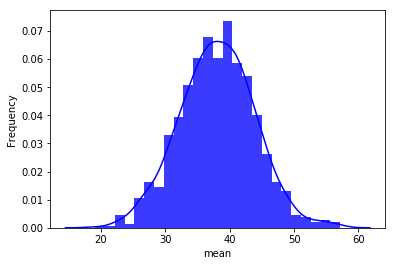

In [84]:
import seaborn
%matplotlib inline
loop=[]
for i in range(1000):
    elements = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 21,32,43,54,65,76,87,98, 109, 120]
    probabilities = [0.05, 0.05, 0.05, 0.05,0.05, 0.05, 0.05, 0.05, 0.05, 0.05,0.05, 0.05, 0.05, 0.05,0.05, 0.05, 0.05, 0.05, 0.05, 0.05]
    vib=np.random.choice(elements, 50, p=probabilities)
    loop.append(vib.mean())
ax=seaborn.distplot(loop,
                kde=True,
                color='blue',
                hist_kws={"linewidth": 22,'alpha':0.77})
ax.set(xlabel='mean',ylabel='Frequency')



### Задание 5

Найдите собственные значения и собственные вектора матрицы (на python и на бумаге)

[[1, 4],

 [1, 1]]

In [59]:
a = np.array([[1, 4],
              [1, 1]])
w, v = np.linalg.eig(a)

In [60]:
for i in range(len(w)):
    print("Собственное значение " + str(w[i]))
    print("соответствующий ему собственный вектор " + str(v[i]))

Собственное значение 3.0000000000000004
соответствующий ему собственный вектор [ 0.89442719 -0.89442719]
Собственное значение -0.9999999999999996
соответствующий ему собственный вектор [0.4472136 0.4472136]


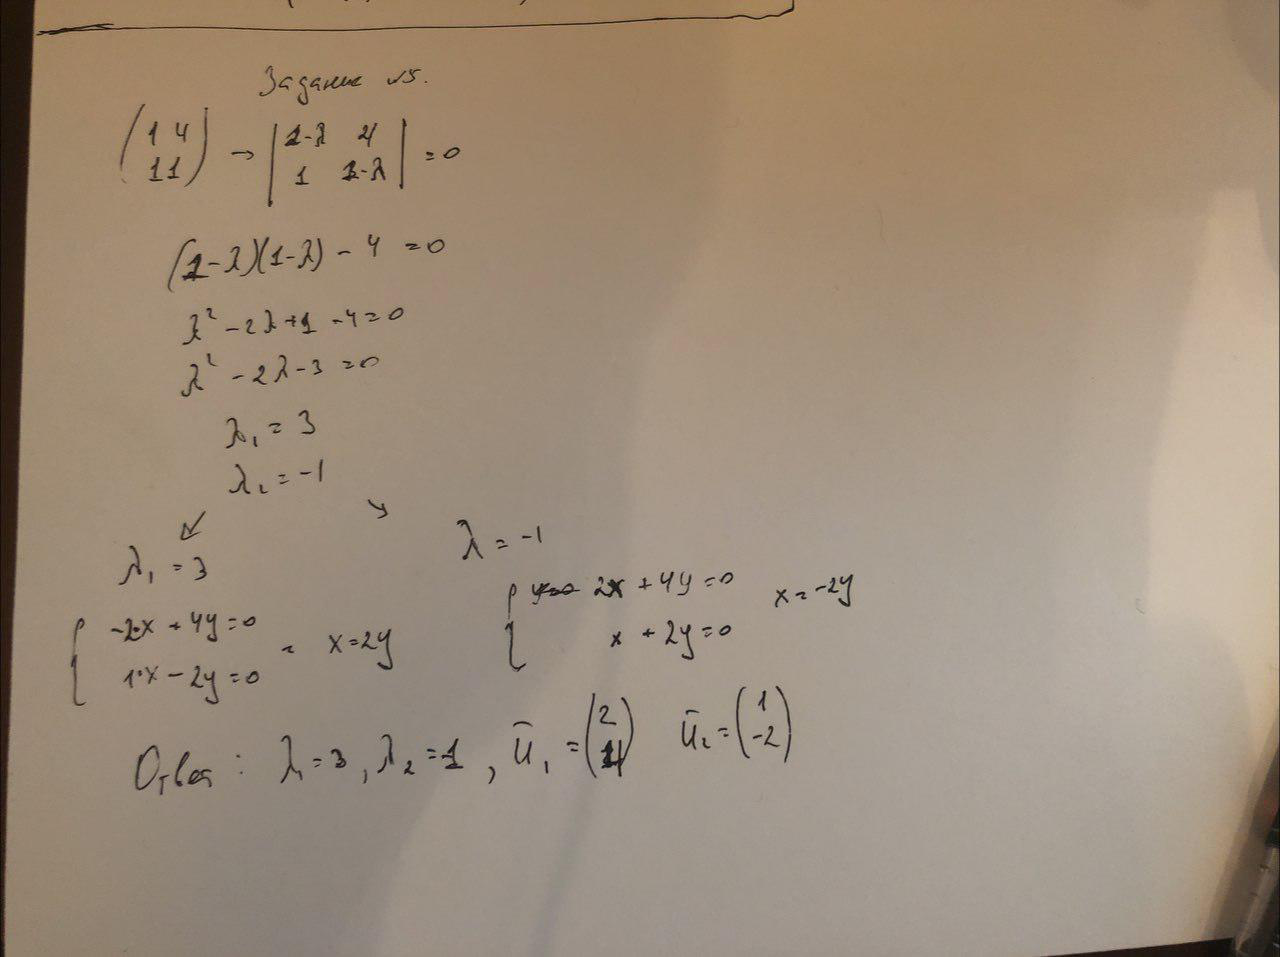

In [62]:
img = Image.open("2.jpg")
img